In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import pandas as pd
import seaborn as sns

# Leemos el Dataset

In [4]:
Apps = pd.read_csv('googleplaystore.csv')
Apps.shape # Filas y columnas que contiene el dataset

(10841, 13)

In [5]:
Apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
Apps.isnull().sum() # Vemos la cantidad de nulos

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Eliminamos los nulos 
 

In [10]:
Apps.dropna(how='any', inplace=True) # Eliminamos las filas con valores faltantes 
# how(se eliminarán todas las filas que contengan al menos un valor faltante)
# inplace=True (que haga el cambio en el propio dataset y no en una copia)

Apps.isnull().sum() 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Vemos que hemos eliminado los valores nulos 

In [12]:
Apps.shape

(9360, 13)

Vemos que la mayoría de columnas son de tipo objeto 

In [31]:
Apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


Antes de codificar las columnas de tipo objeto, haremos un drop a algunas columnas que, desde nuestra perspectiva no aportan datos importantes


In [58]:
Apps_c = Apps.copy()

Apps_drop = Apps_c.drop(['App', 'Price', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)
Apps_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   object 
 3   Size            9360 non-null   object 
 4   Installs        9360 non-null   object 
 5   Type            9360 non-null   object 
 6   Content Rating  9360 non-null   object 
 7   Genres          9360 non-null   object 
dtypes: float64(1), object(7)
memory usage: 916.2+ KB


Ahora con las columnas dropeadas, codificaremos las columnas de tipo objeto

Crearemos una variable con la columna que queremos codificar

In [59]:
Apps_category = Apps_c[ ['Category'] ]

Apps_reviews  = Apps_c[ ['Reviews'] ] # hacer con as_type float

Apps_size     = Apps_c[ ['Size'] ] # cambiar las k y m por su debido valor en ceros

Apps_installs = Apps_c[ ['Installs'] ] # cambiar Varies with device por 0 y luego cambiar esos 0 por la media de la columna

Apps_content  = Apps_c[ ['Content Rating'] ]

Apps_genres   = Apps_c[ ['Genres'] ] # no hacer one hot encoder hacer get_dummies(sep=;)

# para ver duplicados (duplicades)

#ver datos corruptos 


In [60]:
# Creamos una variable con la columna Rating (ya que es la unica con valores numéricos) para luego unirla con las otras columnas codificadas
Apps_all = Apps_c[ ['Rating'] ]

# REVISAR EL CODIGO AQUÍ

Aplicamos el codificador 

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
Apps_drop.reset_index(drop=True, inplace=True) # Al modificar nuestro dataframe puede cambiar el indice 

Creamos un dataframe a partir de esas columnas codificadas

In [57]:
Apps_app_1hot = encoder.fit_transform(Apps_app) # Codificamos la columna de APP

Apps_complete = Apps_all.join(pd.DataFrame(Apps_app_1hot,
                                                       columns=[cat for cat in encoder.categories_[0]])); # Unimos el dataframe de App_all(quien cont nuestra columna rating) con el dataframe codificado

Apps_complete.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Columns: 8191 entries, Rating to 🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
dtypes: float64(8191)
memory usage: 585.3 MB


c:\Users\daniel.alejandro.paz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TypeError: 'tuple' object is not callable

### Algunas visualizaciones 

### Rating

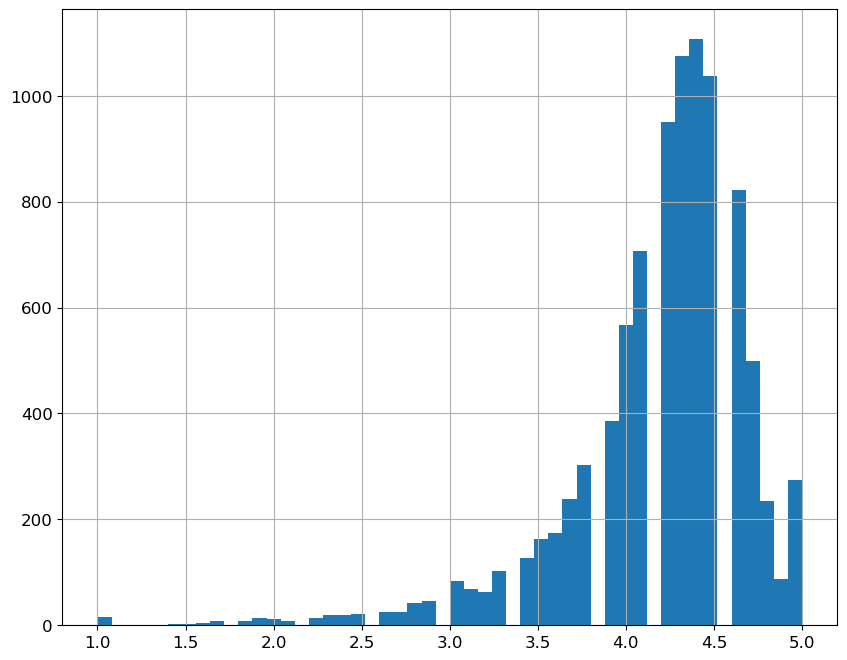

In [15]:
Apps['Rating'].hist(bins=50, figsize=(10,8))
plt.show()

Text(0.5, 1.0, 'Distribución del Rating')

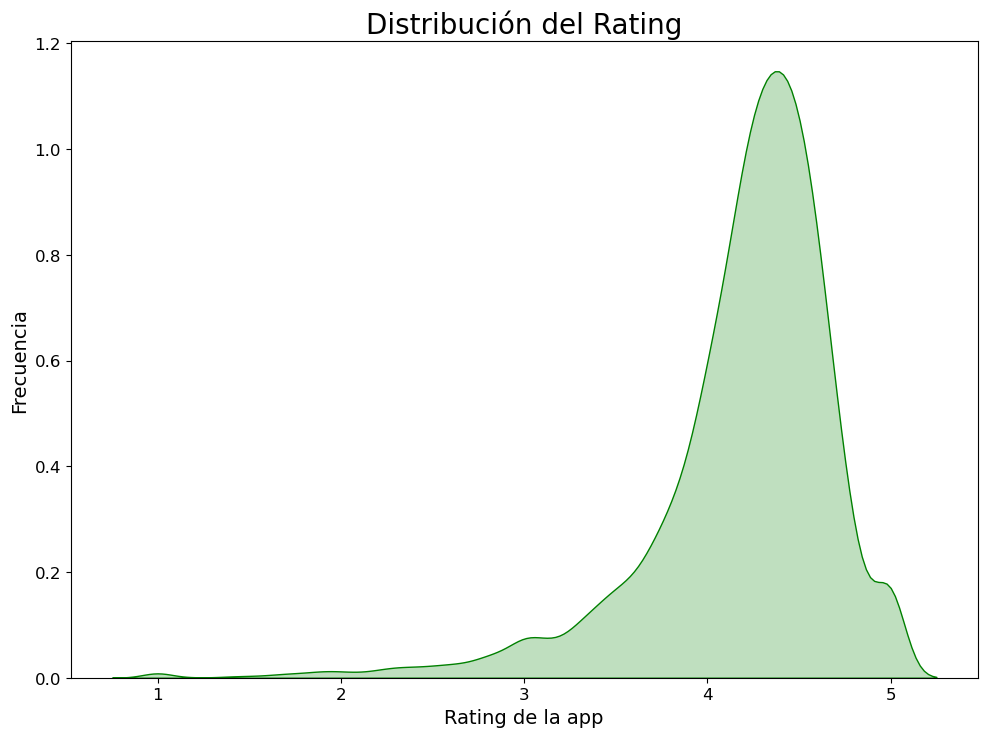

In [18]:
from pylab import rcParams

rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(Apps.Rating, color="Green", shade = True)
g.set_xlabel("Rating de la app")
g.set_ylabel("Frecuencia")
plt.title('Distribución del Rating',size = 20)

### Category

In [26]:
print( len(Apps['Category'].unique()) , "categories") # Nos muestra las diferentes categorías que hay; 'unique' hace que las muestre pero sin repetidos

print("\n", Apps['Category'].unique()) # Imprimimos cuales son esas 33 categorias; usamos '\n' para que nos imprima una línea vacía antes de mostrar las categorías

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Cuenta de las aplicaciones por categorías')

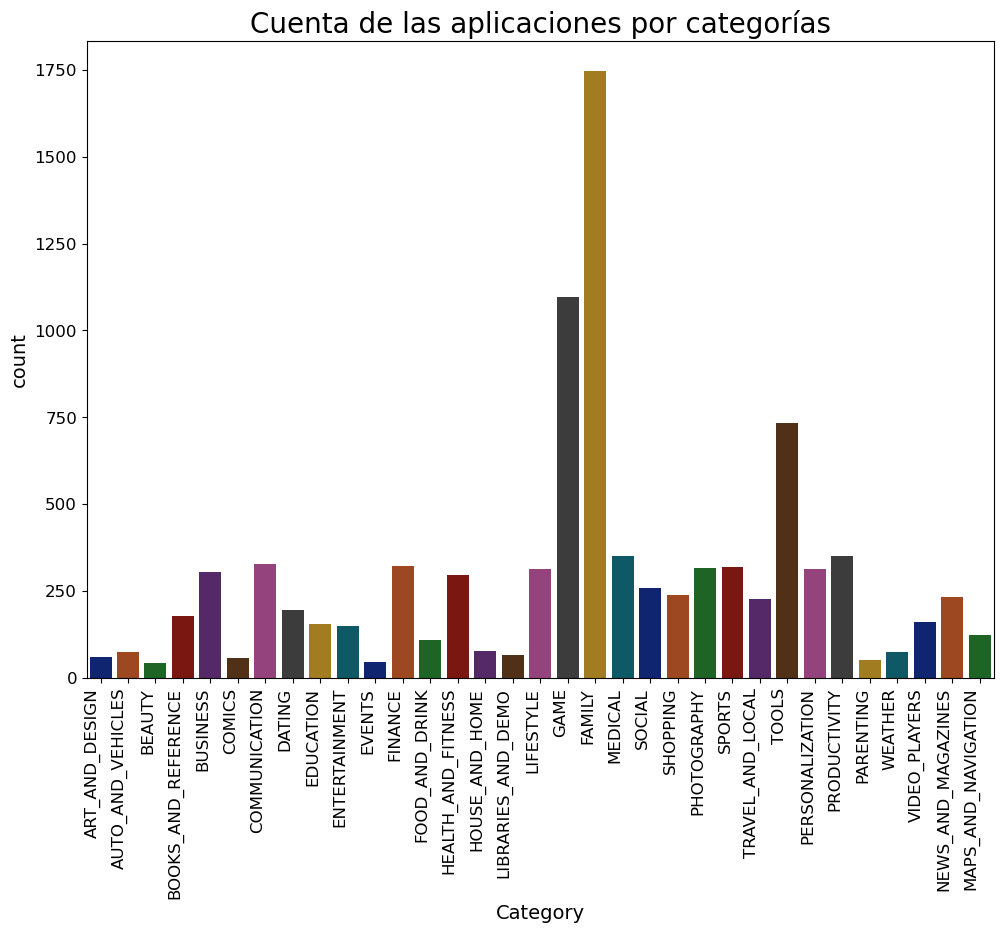

In [29]:
graph = sns.countplot(x="Category",data=Apps, palette = "dark") # papalette = "dark", asignamos una paleta de colores
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, ha="right")
graph 
plt.title('Cuenta de las aplicaciones por categorías',size = 20)

### Reviews